# 1.Data Collection

The data collection in this project consists of three steps:

1.1 Scrap all product's urls

1.2 Scrap all products' information

1.3 Scrap all reviews from each product's page

# 2. Data Wrangling

In this section, besides doing the normal string manipulations, converting data types, and dropping missing values, etc.. I also looked up some of the products and entered the information manually. Sometimes there was an error on the page and the json file was extracted properly. 

## 2.1 Import data

In [1]:
import pandas as pd
import numpy as np
from itertools import chain # to flatten a 2-D list
import math
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None) # display the whole DF content

### 2.1.1 Products
The dataset contains all of the intrinsic features of the given products

In [2]:
data1 = pd.read_csv('Raw_data/Products_to_scrap_reviews_more_than_100_reviews.csv', index_col = 0)
data1.reset_index(inplace = True, drop = True)

In [3]:
data2 = pd.read_csv('Raw_data/Products_to_scrap_reviews_less_than_100_reviews.csv', index_col = 0)
data2.reset_index(inplace = True, drop = True)

In [4]:
# combine 2 datasets into 1
data = data1.append(data2)
data.reset_index(inplace = True, drop = True)
data.shape

(2254, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   brand_name              2254 non-null   object 
 1   product_name            2254 non-null   object 
 2   price                   2254 non-null   object 
 3   size                    2099 non-null   object 
 4   quick_look_description  542 non-null    object 
 5   category                2254 non-null   object 
 6   url                     2254 non-null   object 
 7   sku                     2254 non-null   int64  
 8   quick_sale_description  2253 non-null   object 
 9   loves_count             2254 non-null   int64  
 10  product_id              2254 non-null   object 
 11  no_reviews              2254 non-null   int64  
 12  rating                  2254 non-null   float64
 13  short_description       2254 non-null   object 
 14  long_description        2254 non-null   

### 2.1.2 Product review statistics
The dataset contains rating features for a given product like: number of loves, number of reviews, etc..

In [6]:
# import additional product info with review stats
review_stats1 = pd.read_csv('Raw_data/Review_stats_sephora_more_than_100_reviews.csv', index_col=0)
review_stats1.shape

(369, 36)

In [7]:
review_stats2 = pd.read_csv('Raw_data/Review_stats_sephora_less_than_100_reviews.csv', index_col=0)
review_stats2.shape

(1885, 36)

In [8]:
# combine all reviews into 1 dataset
review_stats = review_stats1.append(review_stats2)
review_stats.reset_index(inplace = True, drop = True)
review_stats.shape

(2254, 36)

### 2.1.3 Merge the 2 datasets to have all features of a product

In [9]:
data = data.merge(review_stats, on = 'product_id', how = 'left',)

### 2.1.4 Reviews data
This dataset contains user information such as user's age, concerns, hair color, etc.. for every single review
'author_id' is the unique identifier for a given user

In [10]:
# import review data 
reviews1 = (pd.read_csv('Raw_data/product_reviews_400.csv', 
                       index_col=0,
                      dtype = {'UserNickname': 'object', 'Rating': 'int64', 'ReviewText': 'object', 
                               'userSkinType': 'object', 'userEyeColor': 'object', 'isSephoraStaff': 'object', 
                               'isVerifiedPurchase': 'object', 'userHairColor': 'object', 'userSkinTone': 'object',
                               'isIncentivizedReview': 'object', 'p_id': 'object', 'author_id': 'object',
                               'TotalPositiveFeedbackCount': 'int64', 'TotalNegativeFeedbackCount': 'int64',
                               'TotalFeedbackCount': 'int64', 'userSkinConcern': 'object'}))

reviews1.shape

(121088, 16)

In [11]:
reviews2 = (pd.read_csv('Raw_data/product_reviews_200.csv', 
                       index_col=0,
                      dtype = {'UserNickname': 'object', 'Rating': 'int64', 'ReviewText': 'object', 
                               'userSkinType': 'object', 'userEyeColor': 'object', 'isSephoraStaff': 'object', 
                               'isVerifiedPurchase': 'object', 'userHairColor': 'object', 'userSkinTone': 'object',
                               'isIncentivizedReview': 'object', 'p_id': 'object', 'author_id': 'object',
                               'TotalPositiveFeedbackCount': 'int64', 'TotalNegativeFeedbackCount': 'int64',
                               'TotalFeedbackCount': 'int64', 'userSkinConcern': 'object'}))

reviews2.shape

(240746, 16)

In [12]:
reviews = reviews1.append(reviews2)
reviews.reset_index(inplace = True, drop = True)
reviews.shape

(361834, 16)

In [13]:
reviews.head()

,UserNickname,Rating,ReviewText,userSkinType,userEyeColor,isSephoraStaff,isVerifiedPurchase,userHairColor,userSkinTone,isIncentivizedReview,p_id,author_id,TotalPositiveFeedbackCount,TotalNegativeFeedbackCount,TotalFeedbackCount,userSkinConcern
0,tooey515,5,"I love this product. I’d been faithful to a different skincare line for years but, after using Shani Darden skincare products, I’m a convert. It is indeed weightless and yet very hydrating. My skin looks 10 years younger and fresher. Don’t walk, run to Sephora to buy all of Shani Darden’s products. You won’t regret it and your skin will love you for it.",dry,blue,false,False,blonde,fair,true,P455930,1409516742,1,0,1,aging
1,LuvlyJ,5,This moisturizer is very light but hydrating. I have normal to oily skin. This has no scent which is great. My kids also use it. Feels great under my makeup.,oily,brown,false,True,brunette,olive,false,P455930,1997394056,2,0,2,aging
2,AyeshaD1995,5,Really loving this moisturizer! Light weight but gets the job done.,combination,brown,false,NaN,black,ebony,false,P455930,1407193700,2,0,2,acne
3,AKRichter,3,"Very lightweight and goes on smooth. Dries down very fast, and leaves skin feeling a bit dry. I won't be repurchasing because the Drunk Elephant moisturizer leaves my face much more hydrated, even if it is way more $$$.",combination,green,false,True,blonde,fair,false,P455930,5168295441,3,0,3,dullness
4,lghettoprincess,4,"I've been using the Shani Darden weightless oil-free moisturizer for a couple of months now and it's pretty good. When you apply it to your face it doesn't feel oily and it absorbs into your skin fast. Not only does it moisturize your skin but you really don't feel it on your face since it's not heavy at all. This is my go to moisturizer when I'm in a rush and don't want to spend so much time moisturizing my face. If you have really dry skin or dry patches on your face, I think you should something else, but this is great for normal dry skin.",combination,brown,false,False,black,medium,true,P455930,1048978944,3,0,3,acne


## 2.2 Product data Cleaning

### 2.2.1 Convert all sizes to oz
size matters when we try to predict prices but to make recommendations, it wont matter

In [14]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

# split size into oz and ml, we only need the oz value, the mL could easily be computed 
data["size_oz"] = data['size'].str.split('/').str[0]
# manually check the products with missing size from website
data.loc[data[data['product_id']=='P427397'].index, ['size_oz']] = '1.7 oz'
data.loc[data[data['product_id']=='P467038'].index, ['size_oz']] = '0.14 oz'
data.loc[data[data['product_id']=='P236816'].index, ['size_oz']] = '0.12 oz'
data.loc[data[data['product_id']=='P393356'].index, ['size_oz']] = '1.18 oz'
data.loc[data[data['product_id']=='P456208'].index, ['size_oz']] = '1.2 oz'
data.loc[data[data['product_id']=='P460856'].index, ['size_oz']] = '1 oz'
data.loc[data[data['product_id']=='P429722'].index, ['size_oz']] = '1 oz'
data.loc[data[data['product_id']=='P460701'].index, ['size_oz']] = '1 oz'
data.loc[data[data['product_id']=='P453825'].index, ['size_oz']] = '1.7 oz'
data.loc[data[data['product_id']=='P442743'].index, ['size_oz']] = '1.7 oz'
data.loc[data[data['product_id']=='P395382'].index, ['size_oz']] = '1.4 oz'
data.loc[data[data['product_id']=='P467038'].index, ['size_oz']] = '1.01 oz' 
data.loc[data[data['product_id']=='P465365'].index, ['size_oz']] = '1.2 oz' 
data.loc[data[data['product_id']=='P236816'].index, ['size_oz']] = '0.12 oz'
data.loc[data[data['product_id']=='P445416'].index, ['size_oz']] = '2.7 oz'
data.loc[data[data['product_id']=='P475172'].index, ['size_oz']] = '4.05 oz'
data.loc[data[data['product_id']=='P468834'].index, ['size_oz']] = '0.25 oz'
data.loc[data[data['product_id']=='P392892'].index, ['size_oz']] = '1.7 oz'
data.loc[data[data['product_id']=='P392891'].index, ['size_oz']] = '1.7 oz'
data.loc[data[data['product_id']=='P478282'].index, ['size_oz']] = '0.97 oz'
data.loc[data[data['product_id']=='P473112'].index, ['size_oz']] = '1.5 oz'
data.loc[data[data['product_id']=='P440273'].index, ['size_oz']] = '1.5 oz'
data.loc[data[data['product_id']=='P464773'].index, ['size_oz']] = '2 oz'
data.loc[data[data['product_id']=='P440274'].index, ['size_oz']] = '1 oz'
data.loc[data[data['product_id']=='P477969'].index, ['size_oz']] = '3.4 oz'
data.loc[data[data['product_id']=='P438362'].index, ['size_oz']] = '6.7 oz'
data.loc[data[data['product_id']=='P476726'].index, ['size_oz']] = '5.1 oz'
data.loc[data[data['product_id']=='P454095'].index, ['size_oz']] = '3.3 oz'
data.loc[data[data['product_id']=='P405584'].index, ['size_oz']] = '2 oz'
data.loc[data[data['product_id']=='P440658'].index, ['size_oz']] = '2 oz'
data.loc[data[data['product_id']=='P442566'].index, ['size_oz']] = '4 oz'
data.loc[data[data['product_id']=='P469449'].index, ['size_oz']] = '4.2 oz'
data.loc[data[data['product_id']=='P380017'].index, ['size_oz']] = '3 oz'
data.loc[data[data['product_id']=='P474969'].index, ['size_oz']] = '5 oz'
data.loc[data[data['product_id']=='P461933'].index, ['size_oz']] = '3.4 oz'
data.loc[data[data['product_id']=='P467137'].index, ['size_oz']] = '1 oz'
data.loc[data[data['product_id']=='P461162'].index, ['size_oz']] = '6 oz'
data.loc[data[data['product_id']=='P467627'].index, ['size_oz']] = '0.95 oz'
data.loc[data[data['product_id']=='P461161'].index, ['size_oz']] = '0.75 oz'
data.loc[data[data['product_id']=='P443540'].index, ['size_oz']] = '1 oz'
data.loc[data[data['product_id']=='P477970'].index, ['size_oz']] = '0.47 oz'
data.loc[data[data['product_id']=='P436363'].index, ['size_oz']] = '2.83 oz'
data.loc[data[data['product_id']=='P435790'].index, ['size_oz']] = '1.7 oz'
data.loc[data[data['product_id']=='P447786'].index, ['size_oz']] = '1.32 oz'
data.loc[data[data['product_id']=='P442857'].index, ['size_oz']] = '0.24 oz'
data.loc[data[data['product_id']=='P387942'].index, ['size_oz']] = '3.2 oz'
data.loc[data[data['product_id']=='P446937'].index, ['size_oz']] = '0.53 oz'
data.loc[data[data['product_id']=='P457008'].index, ['size_oz']] = '0.14 oz'
data.loc[data[data['product_id']=='P454313'].index, ['size_oz']] = '2 oz'
data.loc[data[data['product_id']=='P477413'].index, ['size_oz']] = '1.7 oz'
data.loc[data[data['product_id']=='P465741'].index, ['size_oz']] = '1.7 oz'
data.loc[data[data['product_id']=='P471009'].index, ['size_oz']] = '2.5 oz'
data.loc[data[data['product_id']=='P470541'].index, ['size_oz']] = '1.67 oz'
data.loc[data[data['product_id']=='P443305'].index, ['size_oz']] = '1 oz'
data.loc[data[data['product_id']=='P381021'].index, ['size_oz']] = '3.3 oz'
data.loc[data[data['product_id']=='P415618'].index, ['size_oz']] = '2.54 oz'
data.loc[data[data['product_id']=='P476527'].index, ['size_oz']] = '1.75 oz'
data.loc[data[data['product_id']=='P422905'].index, ['size_oz']] = '0.84 oz'
data.loc[data[data['product_id']=='P461916'].index, ['size_oz']] = '1.18 oz'
data.loc[data[data['product_id']=='P462339'].index, ['size_oz']] = '0.51 oz'
data.loc[data[data['product_id']=='P467602'].index, ['size_oz']] = '0.5 oz'
data.loc[data[data['product_id']=='P476728'].index, ['size_oz']] = '1.0 oz'
data.loc[data[data['product_id']=='P455636'].index, ['size_oz']] = '0.54 oz'
data.loc[data[data['product_id']=='P461224'].index, ['size_oz']] = '0.28 oz'
data.loc[data[data['product_id']=='P474057'].index, ['size_oz']] = '0.5 oz'
data.loc[data[data['product_id']=='P468164'].index, ['size_oz']] = '0.4 oz'
data.loc[data[data['product_id']=='P477805'].index, ['size_oz']] = '0.43 oz'
data.loc[data[data['product_id']=='P446307'].index, ['size_oz']] = '0.34 oz'
data.loc[data[data['product_id']=='P451644'].index, ['size_oz']] = '0.34 oz'
data.loc[data[data['product_id']=='P460855'].index, ['size_oz']] = '0.12 oz'
data.loc[data[data['product_id']=='P456409'].index, ['size_oz']] = '0.5 oz'
data.loc[data[data['product_id']=='P444926'].index, ['size_oz']] = '0.1 oz'
data.loc[data[data['product_id']=='P442263'].index, ['size_oz']] = '0.17 oz'
data.loc[data[data['product_id']=='P453268'].index, ['size_oz']] = '0.34 oz'
data.loc[data[data['product_id']=='P476030'].index, ['size_oz']] = '2.04 oz'
data.loc[data[data['product_id']=='P442990'].index, ['size_oz']] = '1.7 oz'
data.loc[data[data['product_id']=='P475937'].index, ['size_oz']] = '13.1 oz'
data.loc[data[data['product_id']=='P476029'].index, ['size_oz']] = '2.04 oz'
data.loc[data[data['product_id']=='P453268'].index, ['size_oz']] = '0.34 oz'
data.loc[data[data['product_id']=='P474105'].index, ['size_oz']] = '4.89 oz'
data.loc[data[data['product_id']=='P460704'].index, ['size_oz']] = '5.56 oz'
data.loc[data[data['product_id']=='P442844'].index, ['size_oz']] = '8 oz'
data.loc[data[data['product_id']=='P476031'].index, ['size_oz']] = '1.51 oz'
data.loc[data[data['product_id']=='P471761'].index, ['size_oz']] = '0.77 oz'
data.loc[data[data['product_id']=='P462337'].index, ['size_oz']] = '2.04 oz'
data.loc[data[data['product_id']=='P476031'].index, ['size_oz']] = '1.51 oz'
data.loc[data[data['product_id']=='P479111'].index, ['size_oz']] = '2.9 oz'
data.loc[data[data['product_id']=='P442845'].index, ['size_oz']] = '10 oz'
data.loc[data[data['product_id']=='P469844'].index, ['size_oz']] = '1.95 oz'
data.loc[data[data['product_id']=='P446638'].index, ['size_oz']] = '1.45 oz'
data.loc[data[data['product_id']=='P469541'].index, ['size_oz']] = '6.7 oz'
data.loc[data[data['product_id']=='P472180'].index, ['size_oz']] = '4.7 oz'
data.loc[data[data['product_id']=='P459131'].index, ['size_oz']] = '8.2 oz'
data.loc[data[data['product_id']=='P470244'].index, ['size_oz']] = '5 oz'
data.loc[data[data['product_id']=='P411869'].index, ['size_oz']] = '1.2 oz'
data.loc[data[data['product_id']=='P469805'].index, ['size_oz']] = '3 oz'
data.loc[data[data['product_id']=='P459142'].index, ['size_oz']] = '13 oz'
data.loc[data[data['product_id']=='P470048'].index, ['size_oz']] = '6.4 oz'
data.loc[data[data['product_id']=='P470254'].index, ['size_oz']] = '2.5 oz'
data.loc[data[data['product_id']=='P476455'].index, ['size_oz']] = '7.1 oz'
data.loc[data[data['product_id']=='P444055'].index, ['size_oz']] = '0.8 oz'
data.loc[data[data['product_id']=='P476685'].index, ['size_oz']] = '1.61 oz'
data.loc[data[data['product_id']=='P476687'].index, ['size_oz']] = '2.71 oz'
data.loc[data[data['product_id']=='P470260'].index, ['size_oz']] = '3.4 oz'
data.loc[data[data['product_id']=='P474935'].index, ['size_oz']] = '1.15 oz'
data.loc[data[data['product_id']=='P471566'].index, ['size_oz']] = '1 oz'
data.loc[data[data['product_id']=='P456203'].index, ['size_oz']] = '1.69 oz'
data.loc[data[data['product_id']=='P456204'].index, ['size_oz']] = '2.16 oz'
data.loc[data[data['product_id']=='P459132'].index, ['size_oz']] = '0.77 oz'
data.loc[data[data['product_id']=='P458762'].index, ['size_oz']] = '1.78 oz'
data.loc[data[data['product_id']=='P470059'].index, ['size_oz']] = '1.2 oz'
data.loc[data[data['product_id']=='P456210'].index, ['size_oz']] = '1.98 oz'
data.loc[data[data['product_id']=='P425424'].index, ['size_oz']] = '2.92 oz'
data.loc[data[data['product_id']=='P474823'].index, ['size_oz']] = '1.12 oz'
data.loc[data[data['product_id']=='P398761'].index, ['size_oz']] = '2.45 oz'
data.loc[data[data['product_id']=='P448543'].index, ['size_oz']] = '0.4375 oz'
data.loc[data[data['product_id']=='P438639'].index, ['size_oz']] = '0.51 oz'
data.loc[data[data['product_id']=='P416824'].index, ['size_oz']] = '1.16 oz'
data.loc[data[data['product_id']=='P443812'].index, ['size_oz']] = '0.51 oz'
data.loc[data[data['product_id']=='P411360'].index, ['size_oz']] = '6.32 oz'
data.loc[data[data['product_id']=='P378219'].index, ['size_oz']] = '5.46 oz'
data.loc[data[data['product_id']=='P448712'].index, ['size_oz']] = '2.31 oz'
data.loc[data[data['product_id']=='P433982'].index, ['size_oz']] = '0.24 oz'
data.loc[data[data['product_id']=='P416589'].index, ['size_oz']] = '1.01 oz'
data.loc[data[data['product_id']=='P416588'].index, ['size_oz']] = '1.01 oz'
data.loc[data[data['product_id']=='P399622'].index, ['size_oz']] = '2.72 oz'

(data['size_oz'].replace(to_replace = ['fl ', 'fl.', 'Pump', 'packets', 'Standard Size - ','Refill', 
                                       'Limited Edition - ', ' - Mini'], value = '', regex = True, inplace = True))
#convert from ml to oz
temp = data.loc[data['size_oz'].str.contains('ml|ML|Ml|mL', na = False), ['size_oz']].squeeze() #convert DF to series
temp1 = temp.str.strip()# remove trailing spaces
data.loc[data['size_oz'].str.contains('ml|ML|Ml|mL', na = False), ['size_oz']] = temp1.str.split(' ').str[0].str.split('ml').str[0].astype(float)*0.034

#convert from g to oz
temp2 = data.loc[data['size_oz'].str.contains('10 g|65 g', na = False), ['size_oz']].squeeze() #convert DF to series
data.loc[data['size_oz'].str.contains('10 g|65 g', na = False), ['size_oz']] = temp2.str.split(' ').str[0].astype(float)*.034

# 132 products with all unusual sizes such as wipes, mitt, pack, mask, capsules will be given a size value NaN
data.loc[data['size'].str.contains('Ampoules|Count|Sachets;|Roll|Swabs|pairs|Pair|Pack|Packs|pack|Pads|pads|Bonus|bonus|Sheets|sheets|Wipes|wipes|Cloths|Dots|dots|Softgels|patches|Patches|Capsules|capsules|Mitt|mitt|Caddy|caddy|hearts|Gummies|bags|Heads|Tablets|tablets|Heads', na = True), ['size_oz', 'size']] = np.nan

# each mask is 1.01 oz
#(data.loc[data['size'].str.contains('Mask|mask|Masks|masks|Treatments|treatments|Treatment', na = True), ['size']] = np.nan)
temp3 = data.loc[data['size'].str.contains('Mask|mask|Masks|masks|Trea6ments|treatments|Treatment', na = False), ['size']].squeeze()
data.loc[data['size'].str.contains('Mask|mask|Masks|masks|Treatments|treatments|Treatment', na = False), ['size_oz']] = (temp3.str.split(' ').str[0].str.split('x').str[0]).astype(float)*1.01

#check for bulk sizes
data.loc[data['size_oz'].str.contains('x', na = False), ['size_oz']]
temp4 = data.loc[data['size_oz'].str.contains('x', na = False), ['size_oz']].squeeze().str.split(' ').str[0]
temp5 = data.loc[data['size_oz'].str.contains('x', na = False), ['size_oz']].squeeze().str.split(' ').str[2]
data.loc[data['size_oz'].str.contains('x', na = False), ['size_oz']] = temp4.astype(float) * temp5.astype(float)

data['size_oz'] = data['size_oz'].str.strip(' ')
data['size_oz'] = data['size_oz'].str.strip('oz')
data['size_oz'] = data['size_oz'].astype('float', errors = 'raise')

data.drop(columns = ['size'], inplace = True)
print('no. products with missing size: ', data['size_oz'].isnull().sum())

no. products with missing size:  317


### 2.2.2 Price

no. products with missing price:  0


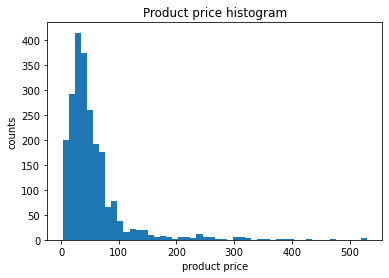

In [15]:
# strip the dollar sign from price column 
data.loc[:, ['price']] = data.price.str.strip('$')
data['price'] = data['price'].astype('float', errors = 'raise')
print('no. products with missing price: ', data['price'].isnull().sum())
_ = plt.hist(data['price'], bins = 50)
_ = plt.title('Product price histogram')
_ = plt.xlabel('product price')
_ = plt.ylabel('counts')

In [16]:
data['price_per_oz'] = data['price']/data['size_oz']
data['size_oz'].fillna(value = 0, inplace = True)
data['price_per_oz'].fillna(value = 0, inplace = True)

### 2.2.3 Number of reviews

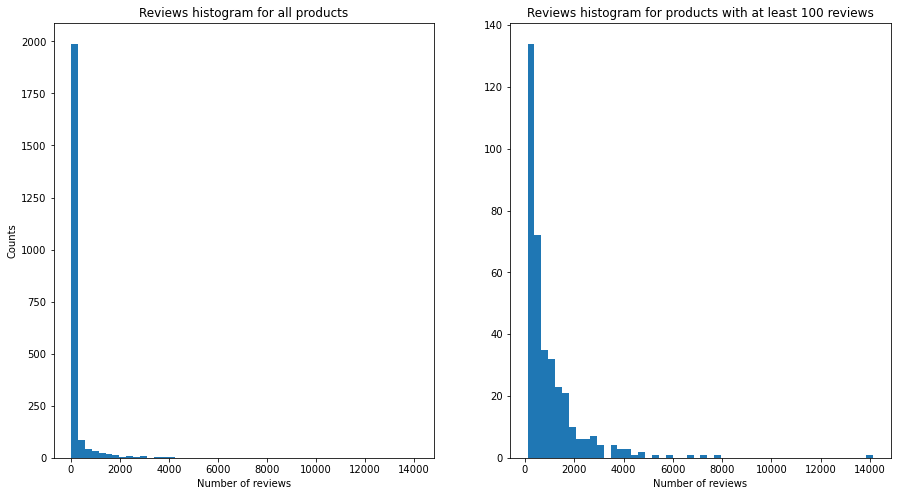

In [17]:
# print('no_reviews quantile')
# print(data['no_reviews'].quantile([.25, .5, .75, .9]))
# print('no products with missing no_reviews: ', data['no_reviews'].isnull().sum())
# print('no_products with at least 100 reviews: ', data[data['no_reviews'] >= 100].shape[0])
# print('no_products with fewer than 100 reviews: ', data[data['no_reviews'] < 100].shape[0])
# print('total number of reviews: ', str(data['no_reviews'].sum()))
# print('total number of reviews for products with at least 100 reviews: ', data[data['no_reviews']>=100]['no_reviews'].sum())

fig, axs = plt.subplots(1, 2)
fig.set_figheight(8)
fig.set_figwidth(15)

_ = axs[0].hist(data['no_reviews'], bins = 50)
_ = axs[0].set_title('Reviews histogram for all products')
_ = axs[0].set_xlabel('Number of reviews')
_ = axs[0].set_ylabel('Counts')

_ = axs[1].hist(data[data['no_reviews']>=100]['no_reviews'], bins = 50)
_ = axs[1].set_title('Reviews histogram for products with at least 100 reviews')
_ = axs[1].set_xlabel('Number of reviews')

### 2.2.4 Brands:

In [18]:
print('Number of brands: ', len(data['brand_name'].unique()))

Number of brands:  168


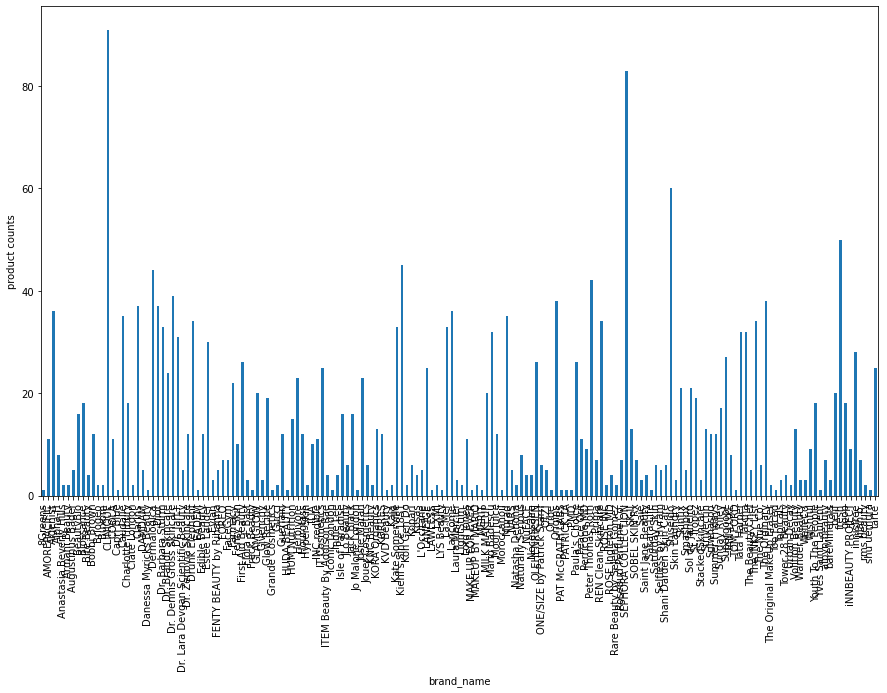

In [19]:
# plot number of products by brands
_ = data.groupby('brand_name')['product_id'].count().plot(kind = 'bar', figsize = (15, 9))
_ = plt.ylabel('product counts')

### 2.2.5 Number of Loves

In [20]:
print('love counts quantile')
print(data['loves_count'].quantile([.25, .5, .75, .9]))

love counts quantile
0.25     4090.5
0.50     9564.5
0.75    26905.0
0.90    61776.3
Name: loves_count, dtype: float64


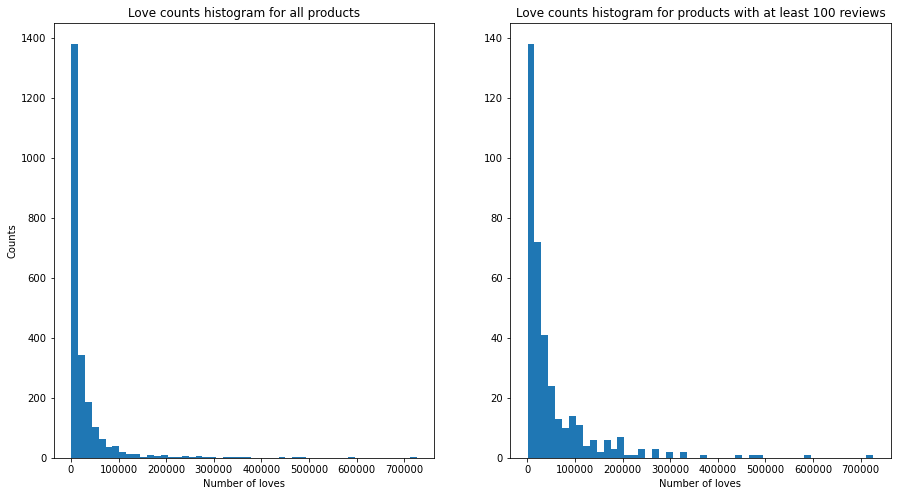

In [21]:
fig, axs = plt.subplots(1, 2)
fig.set_figheight(8)
fig.set_figwidth(15)

_ = axs[0].hist(data['loves_count'], bins = 50)
_ = axs[0].set_title('Love counts histogram for all products')
_ = axs[0].set_xlabel('Number of loves')
_ = axs[0].set_ylabel('Counts')

_ = axs[1].hist(data[data['no_reviews']>=100]['loves_count'], bins = 50)
_ = axs[1].set_title('Love counts histogram for products with at least 100 reviews')
_ = axs[1].set_xlabel('Number of loves')

### 2.2.6 Ratings and RecommendedCount

In [22]:
# Products with missing Recommended Counts are ones with no reviews, fill the missing values with 0
data[data['RecommendedCount'].isnull()][['RecommendedCount', 'loves_count', 'no_reviews']]
data['RecommendedCount'].fillna(value = 0, inplace = True)

### 2.2.7 Parse product highlighted features

In [23]:
# first convert all upper case to lower case
data['highlights'] = data.highlights.str.lower()
data['highlights'] = data.highlights.str.strip('[').str.strip(']')
# remove uneccessary words 
data['highlights'].replace(to_replace = ['good for: ', 'best for ', '-', ':', '&\\xa0', '\''], value = '', regex = True, inplace = True)
# data['highlights'] = data.highlights.str.strip()

data['highlights'].fillna(value = 'None', inplace = True)
highlight_features = []
for irow in range(data.shape[0]):
    if type(data.loc[irow, 'highlights']) == str:
        row = data.loc[irow, 'highlights'].strip('[').strip(']').split(',')
        highlight_features.append(row)

# we first need to convert the 2D list into 1D using chain.from_iterable method
# then we can use pd.DataFrame to figure out the unique elements 
unique_highlight_features = pd.DataFrame(chain.from_iterable(highlight_features))[0].unique()
print('no of unique highlight features: ', str(len(unique_highlight_features)))
unique_highlight_features


no of unique highlight features:  146


array(['dry skin', ' dryness', ' fragrance free', ' crueltyfree',
       ' clean at sephora', ' community favorite', 'dry', ' combo',
       ' normal skin', ' hyaluronic acid', ' alcohol free', ' oil free',
       'dryness', ' loss of firmness', 'fragrance free', ' dry',
       ' dullness/uneven texture', ' without parabens ', ' antiaging',
       'oily skin', ' without phthalates ', 'hydrating', ' plumping ',
       'vegan', ' without silicones', ' gluten free', 'oily', ' pores ',
       ' without sulfates sls & sles', ' vegan',
       ' clean + planet positive', ' without mineral oil ',
       'clean at sephora', ' hydrating',
       ' allure 2020 best of beauty award winner ', ' oily',
       ' acne/blemishes', ' salicylic acid', 'niacinamide',
       'hyaluronic acid', ' allure 2019 best of beauty award winner ',
       'aha/glycolic acid', 'without sulfates sls & sles', ' retinol',
       ' vitamin c', 'salicylic acid', ' niacinamide', 'None',
       'dark circles', ' dark spots',

In [24]:
data['highlights'].replace(to_replace = [' ', ',', '/', '\+'], value = '', inplace = True, regex = True)

In [25]:
# group highlight features into groups
hl_by_preser = (['Fragrance Free', 'Alcohol Free', 'Oil Free', 'Without Parabens ', 'Without Phthalates ','Without Sulfates SLS & SLES', 
  'Gluten Free', 'Without Mineral Oil ', 'Without Silicones', 'Without Formaldehydes', 'Without Oxybenzone', 'Without Retinyl Palmitate'])
hl_by_trends = ['Cruelty-Free', 'Clean at Sephora', 'Community Favorite', 'Vegan', 'Clean + Planet Positive', 'Reef Safe SPF']
hl_by_ingredient = (['Hyaluronic Acid', 'Niacinamide', 'Salicylic Acid','AHA/Glycolic Acid', 'Lactic Acid', 'Retinol', 'Vitamin C', 
 'UV Protection', 'Collagen'])
hl_by_concerns = (['Best for Dry Skin', 'Good for: Dryness', 'Best for Dry', 'Combo',  'Normal Skin', 'Good for: Loss of firmness',
                  'Good for: Dullness/Uneven Texture', 'Good for: Anti-Aging', 'Best for Oily Skin', 'Good for: Pores',
                  'Good for: Acne/Blemishes', 'Good for: Dark Circles', 'Good for: Dark spots',
                   'Best for Normal Skin', 'Good for: Redness'])
hl_by_award = ['allure 2020 Best of Beauty Award Winner ']

In [26]:
# we cant use one-hot-encoder or label because each product contains a string of many possible highlights 
data['fragrance_free'] = [1 if 'Fragrance Free' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['alcohol_free'] = [1 if 'Alcohol Free' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['phthalates_free'] = [1 if 'Without Phthalates' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['sulfate_free'] = [1 if 'Without Sulfates SLS & SLES' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['formaldehydes_free'] = [1 if 'Without Formaldehydes' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['parabens_free'] = [1 if 'Without Parabens' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['mineral_oil_free'] = [1 if 'Without Mineral Oil' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['oil_free'] = [1 if 'Oil Free' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['gluten_free'] = [1 if 'Gluten Free' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]

data['cruelty_free'] = [1 if 'Cruelty-Free' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['clean_at_sephora'] = [1 if 'Clean at Sephora' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['vegan'] = [1 if 'Vegan' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['planet_positive'] = [1 if 'Clean + Planet Positive' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['community_favorite'] = [1 if 'Community Favorite' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]

data['ha_acid'] = [1 if 'Hyaluronic Acid' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['niacinamide'] = [1 if 'Niacinamide' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['salicylic_acid'] = [1 if 'Salicylic Acid' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['AHA_Glycolic_acid'] = [1 if 'AHA/Glycolic Acid' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['retinol'] = [1 if 'Retinol' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['vitamin_C'] = [1 if 'Vitamin C' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['uv_protection'] = [1 if 'UV Protection' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['collagen'] = [1 if 'Collagen' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]

data['dry_skin'] = [1 if 'Dry' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['combo_skin'] = [1 if 'Combo' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['normal_skin'] = [1 if 'Normal' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['combo_skin'] = [1 if 'Combo' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['oily_skin'] = [1 if 'Oily' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]

data['firmness'] = [1 if 'firmness' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['dullness'] = [1 if 'Dullness' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['pores'] = [1 if 'Pores' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['acne'] = [1 if 'Acne' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['dark_cirlces'] = [1 if 'Dark Cirlces' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['dark_spots'] = [1 if 'Dark spots' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]
data['redness'] = [1 if 'Redness' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]

data['allure_award'] = [1 if 'Beauty' in data['highlights'][irow] else 0 for irow in range(0, data.shape[0])]


In [27]:
highlight_features = (['fragrance_free', 'alcohol_free', 'phthalates_free', 'sulfate_free', 'formaldehydes_free', 
                       'parabens_free', 'mineral_oil_free', 'oil_free', 'gluten_free', 'cruelty_free', 'clean_at_sephora',
                       'vegan', 'planet_positive', 'community_favorite', 
                       'ha_acid', 'niacinamide', 'salicylic_acid', 'AHA_Glycolic_acid', 'retinol', 'vitamin_C', 
                       'uv_protection', 'collagen', 
                       'dry_skin', 'combo_skin','normal_skin','combo_skin', 'oily_skin',
                       'firmness', 'dullness','pores','acne','dark_cirlces','dark_spots','redness','allure_award'])

### 2.2.8 Short Descriptions
The 'short_description' and 'highlights' features contain overlapping contents but short_description doesnt have any 
missing value; thus, we'll drop 'highlights'

In [28]:
(data['short_description'].replace(to_replace = ['What it is:', 'What it is formulated', 'to do', 
                                                 'Skin Type', 'Skincare Concerns:',
                                                 'Highlighted Ingredients:', 'Ingredient Callouts:',
                                                 'Which skin type is it good for?', '<br>',
                                                 'What else you need to know',
                                                 'What Else You Need to Know'], 
                                   value = '', 
                                   regex = True, 
                                   inplace = True))
(data['short_description'].replace(to_replace = ['\r','\n', ':', '<b>', '</b>', '-'], 
                                   value = ' ', 
                                   regex = True, 
                                   inplace = True))
data['short_description'] = data['short_description'].copy().str.strip()


### 2.2.9 Ingredients

In [29]:
# manually fill in some missing ingredients
data.loc[data[data['product_id']=='P468634'].index, ['ingredients']] = 'Water\Aqua\Eau, Cyclopentasiloxane, Bis-Diglyceryl Polyacyladipate-2, Butylene Glycol, Ppg-2 Myristyl Ether Propionate, Cetyl Alcohol, Peg-40 Stearate, Butyrospermum Parkii (Shea Butter), Squalane, Glyceryl Stearate, Sorbitan Stearate, Epilobium Angustifolium Extract, Yeast Extract\Faex\Extrait De Levure, Beta-Carotene, Sodium Hyaluronate, Citrus Grandis (Grapefruit) Peel Oil, Tocopheryl Acetate, Methyl Glucose Sesquistearate, Pelargonium Graveolens (Geranium) Flower Oil, Dimethicone Crosspolymer, Acrylates/C10-30 Alkyl Acrylate Crosspolymer, Carbomer, Peg-20 Methyl Glucose Sesquistearate, C12-15 Alkyl Ethylhexanoate, Tetrasodium Edta, Sodium Hydroxide, Panthenol, Magnesium Ascorbyl Phosphate, Limonene, Citronellol, Geraniol, Linalool, Chlorphenesin, Phenoxyethanol.'
data.loc[data[data['product_id']=='P455914'].index, ['ingredients']] = 'Water\Aqua\Eau, Bifida Ferment Lysate, Propanediol, Butylene Glycol, Glycerin, Lactobacillus Ferment, Betaine, Prunus Lannesiana Flower Extract, Anthemis Nobilis (Chamomile) Flower Extract, Laminaria Saccharina Extract, Oryza Sativa (Rice) Lees Extract, Caffeine, Sodium Hyaluronate, Acetyl Hexapeptide-8, Trehalose, Acetyl Glucosamine, Glycine Soja (Soybean) Seed Extract, Caprylyl Glycol, Peg-75, Ppg-5-Ceteth-20, Carbomer, Citric Acid, Pentylene Glycol, Tromethamine, Disodium Edta, Sodium Citrate, Potassium Sorbate, Phenoxyethanol'
data.loc[data[data['product_id']=='P474122'].index, ['ingredients']] = 'Water/Aqua/Eau, Trimethylolpropane Tricaprylate/Tricaprate, Caprylic/Capric/Myristic/Stearic Triglyceride, Caprylic/Capric Triglyceride, Glycerin, Myristyl Nicotinate, Dimethicone, Cetearyl Alcohol, Bis-Stearyl Dimethicone, Pentaerythrityl Distearate, Aloe Barbadensis Leaf Juice, Isosorbide Dicaprylate, Hydrogenated Ethylhexyl Olivate, Glyceryl Stearate, Stearoxymethicone/Dimethicone Copolymer, Cetyl Palmitate, 1,2-Hexanediol, Retinal, Retinol, Bidens Pilosa Extract, Acetyl Hexapeptide-8, Beta-Glucan, Avena Sativa (Oat) Kernel Extract, Oryza Sativa (Rice) Bran Extract, Glycine Soja (Soybean) Seed Extract, Astrocaryum Murumuru Seed Butter, Gossypium Herbaceum (Cotton) Seed Oil, Butyrospermum Parkii (Shea) Butter, Helianthus Annuus (Sunflower) Extract, Hydrogenated Olive Oil Unsaponifiables, Linum Usitatissimum (Linseed) Seed Oil, Rosmarinus Officinalis (Rosemary) Leaf Extract, Bacillus/Sea Salt Ferment Filtrate, Salix Alba (Willow) Bark Extract, Adenosine, Sodium Hyaluronate, Zingiber Officinale (Ginger) Root Extract, Hydroxyethyl Acrylate/Sodium Acryloyldimethyl Taurate Copolymer, Ceteareth-20, Bisabolol, Polysorbate 20, Isohexadecane, Lactic Acid, Methyl Methacrylate/Glycol Dimethacrylate Crosspolymer, Ascorbic Acid, Propyl Gallate, PEG-40 Stearate, Polysilicone-11, Sorbitan Isostearate, Polysorbate 60, Tocopherol, Caprylyl Glycol, Tocopheryl Acetate, Pentylene Glycol, Ethylhexylglycerin, Xanthan Gum, Resveratrol, Disodium EDTA, Aminomethyl Propanol, Parfum/Fragrance, BHT, Phenoxyethanol, Potassium Sorbate, Phenethyl Alcohol, Citric Acid'
data.loc[data[data['product_id']=='P453814'].index, ['ingredients']] = '#14375/A Hydrogenated Polyisobutene, Tridecyl Trimellitate, Polybutene, Pentaerythrityl Tetraisostearate, Phytosteryl/Octyldodecyl Lauroyl Glutamate, Ethylene/Propylene/Styrene Copolymer, Ethylhexyl Palmitate, Caprylic/Capric Triglyceride, Butylene/Ethylene/Styrene Copolymer, Parfum (Fragrance), Polyglyceryl-2 Triisostearate, Luffa Cylindrica Seed Oil, Prunus Avium (Sweet Cherry) Seed Oil, Trimethylolpropane Triisostearate, Diisostearyl Malate, Tocopherol, Pentaerythrityl Tetra-Di-T-Butyl Hydroxyhydrocinnamate, Undaria Pinnatifida Extract, Benzyl Alcohol, Propyl Gallate, [+/- :Ci 12085 (Red 36, Red 36 Lake), Ci 15850 (Red 6, Red 7, Red 7 Lake), Ci 15985 (Yellow 6, Yellow 6 Lake), Ci 17200 (Red 33), Ci 19140 (Yellow 5, Yellow 5 Lake), Ci 42090 (Blue 1, Blue 1 Lake), Ci 45380 (Red 21, Red 21 Lake, Red 22, Red 22 Lake), Ci 45410 (Red 27, Red 27 Lake, Red 28, Red 28 Lake), Ci 73360 (Red 30, Red 30 Lake), Ci 77163 (Bismuth Oxychloride), Ci 77491, Ci 77492, Ci 77499 (Iron Oxides), Ci 77742 (Manganese Violet), Ci 77891 (Titanium Dioxide)'
data.loc[data[data['product_id']=='P392235'].index, ['ingredients']] = 'CETYL ETHYLHEXANOATE, ORYZA SATIVA (RICE) BRAN OIL, POLYGLYCERYL-10 DIOLEATE, POLYGLYCERYL-2 SESQUICAPRYLATE, CAMELLIA JAPONICA SEED OIL, SACCHAROMYCES/CAMELLIA SINENSIS LEAF/CLADOSIPHON OKAMURANUS/RICE FERMENT FILTRATE*, AQUA/WATER/EAU, GLYCERYL BEHENATE/EICOSADIOATE, PROPANEDIOL, TOCOPHEROL, ETHYLHEXYLGLYCERIN, PARFUM/FRAGRANCE, PHENOXYETHANOL'.lower()

data.loc[data[data['product_id']=='P479125'].index, ['ingredients']] = 'Water / Aqua / EAU, Propanediol, Dicaprylyl Carbonate, Glycerin, Pentylene Glycol, Sodium Hyaluronate, Hydrolyzed Sodium Hyaluronate, Glycine, Serine, Glutamic Acid, Aspartic Acid, Leucine, Alanine, Lysine, Arginine, Tyrosine, Phenylalanine, Proline, Threonine, Valine, Isoleucine, Histidine, Ascorbic Acid, Saccharide Isomerate, Haematococcus pluvialis Extract, Ceramide NP, Tocopheryl Acetate, Tocopherol, Hexapeptide-11, Palmitoyl Tripeptide-1, Ananas sativus (Pineapple) Fruit Extract, Saccharomyces/Magnesium Ferment, Saccharomyces/Copper Ferment, Saccharomyces/Silicon Ferment, Butylene Glycol, Glyceryl Acrylate/Acrylic Acid Copolymer, Glyceryl Caprylate, Sucrose Stearate, Lecithin, Polyglyceryl-10 Laurate, Xanthan Gum, Cetearyl Olivate, Sorbitan Olivate, Sodium Citrate, Carbomer, Citric Acid, Cetearyl Alcohol, Sodium Hydroxide, Lactobacillus Ferment, Leuconostoc/Radish Root Ferment Filtrate, Hydroxyacetophenone, Iron Oxides (Ci 77491).'
data.loc[data[data['product_id']=='P7880'].index, ['ingredients']] = 'Aqua (Water), Coco-Glucoside, Glycerin, Butylene Glycol, PEG-7 Glyceryl Cocoate, Xanthan Gum, Glycine Soja (Soybean) Oil, Helianthus Annuus (Sunflower) Seed Oil, Borago Officinalis Seed Oil, Aloe Barbadensis Leaf Juice, Cucumis Sativus (Cucumber) Fruit Extract, Rosa Damascena Extract, Rosa Damascena Flower Water, Centaurea Cyanus Flower Extract, Glycine Soja (Soybean) Sterols, Panax Ginseng Root Extract, Rosa Damascena Flower Oil, Malva Sylvestris (Mallow) Flower Extract, Tocopherol, Ascorbyl Palmitate, PEG-120 Methyl Glucose Dioleate, PEG-40 Hydrogenated Castor Oil, Caprylyl Glycol, Polysorbate 20, Caprylic/Capric Triglyceride, Silica, Benzoic Acid, Disodium EDTA, Citric Acid, Behenyl Alcohol, Glyceryl Stearate, Lecithin, Pentylene Glycol, Hydrolyzed Soy Protein, Caramel, Sodium Benzoate, Potassium Sorbate, Phenoxyethanol '
data.loc[data[data['product_id']=='P45503'].index, ['ingredients']] = 'WATER/AQUA/EAU, ALUMINA, CAPRYLIC/CAPRIC TRIGLYCERIDE, GLYCERIN, CETYL ALCOHOL, GLYCERYL STEARATE, SIMMONDSIA CHINENSIS (JOJOBA) SEED OIL, ALLANTOIN, XANTHAN GUM, PEG-100 STEARATE, LACTIC ACID, MENTHYL LACTATE, CAPRYLYL GLYCOL, CITRUS LIMON (LEMON) PEEL OIL, CITRUS AURANTIFOLIA (LIME) OIL, ALOE BARBADENSIS LEAF JUICE, VITIS VINIFERA (GRAPE) SEED EXTRACT, CAMELLIA OLEIFERA LEAF EXTRACT, CHAMOMILLA RECUTITA (MATRICARIA) EXTRACT, CAMELLIA SINENSIS LEAF EXTRACT, CITRAL, TOCOPHERYL ACETATE, SODIUM BENZOATE, AMMONIUM ACRYLOYLDIMETHYLTAURATE/VP COPOLYMER, DISODIUM EDTA, PROPYLENE GLYCOL, ALCOHOL DENAT., PHENOXYETHANOL, MYRISTYL ALCOHOL, STEARYL ALCOHOL, T-BUTYL ALCOHOL, LIMONENE.'.lower()
data.loc[data[data['product_id']=='P474376'].index, ['ingredients']] = 'Aqua (Water), Dihydroxyacetone, Alcohol Denat (Alcohol), Glycerin, Erythrulose, Rubus Idaeus (Raspberry) Seed Oil, Aloe Barbadensis Leaf Juice, Hydrolysed Silk, Caramel, Tocopheryl Acetate, Xanthan Gum, Polysorbate 80, Parfum (Fragrance), Limonene, Geraniol, Hexyl Cinnamal, Benzyl Salicylate, Bu-Tylphenyl Methylpropional, Sodium Hydroxide, Benzoic Acid, Dehydroacetic Acid, Phenoxyethanol.'
data.loc[data[data['product_id']=='P437503'].index, ['ingredients']] = 'Barley Grass (Hordeum vulgare) Whole Leaf Powder, Wheatgrass (Triticum aestivum) Whole Leaf Powder, Natural Flavours, Pineapple (Ananas comosus) Fruit Powder, Apple (Malus pumila) Fruit Powder, Organic Whole Leaf Alfalfa (Medicago sativa) Powder, Spinach (Spinacia oleracea) Whole Leaf Powder, Goji Berry (Lycium barbarum) Fruit Extract, Gum Blend (Guar gum, Gum acacia, Xanthan Gum), Fructooligosaccharides (FOS), L-Glutamine, Linseed Meal Powder, Psyllium (Plantago asiatica) Husk Powder, Carrot (root) Powder, Xylitol, Lemon (Citrus limon) Fruit Powder, Lime (Citrus aurantiifolia) Fruit Powder, Pectin, Acai Berry (Euterpe oleracea) Fruit Extract, Pomegranate (Punica granatum) Fruit Powder, Calcium Citrate, Papaya (Carica Papaya) Fruit Powder, Probiotic Blend (Lactobacillus Acidophilus, Bifidobacterium Bifidum, Bifidobacterium Lactis, Bifidobacterium Longum), Organic Spirulina (cyanobacteria) Powder, Beetroot (juice) Powder, Broccoli (Brassica oleracea) Flowering Tops Powder, Grape Seed Extract, Kelp Powder, Magnesium Citrate, Milk Thistle (Silybum marianum) Seed Extract, Siberian Ginseng (Eleutherococcus senticosus) Root Extract, Zinc Gluconate, Dandelion (Taraxacum officinale) Leaf Extract, Maitake Mushroom Powder, Shiitake Mushroom Powder, Green Tea (Camellia sinensis) Leaf Extract, Turmeric (Curcuma longa) Root Extract, Aloe Vera (Aloe barbadensis) Leaf Powder, Horsetail (Equisetum arvense) Herb Extract, Steviol Glycosides, Copper Gluconate, Betacarotene, D-Biotin, Selenium Methionine.'
data.loc[data[data['product_id']=='P476516'].index, ['ingredients']] = 'AQUA/WATER/EAU, COCOS NUCIFERA (COCONUT) OIL, GLYCERIN, CAPRYLIC/CAPRIC TRIGLYCERIDE, ORYZA SATIVA (RICE) BRAN OIL, PROPANEDIOL, CETEARYL ALCOHOL, CETYL ETHYLHEXANOATE, DIMETHICONE, BUTYROSPERMUM PARKII (SHEA) BUTTER, MANGIFERA INDICA (MANGO) SEED BUTTER, CETEARYL OLIVATE, DIISOSTEARYL MALATE, POLYGLYCERYL-3 METHYLGLUCOSE DISTEARATE, CITRULLUS LANATUS (WATERMELON) SEED OIL, HIBISCUS SABDARIFFA SEED OIL, ADANSONIA DIGITATA SEED OIL, MALPIGHIA PUNICIFOLIA (ACEROLA) FRUIT EXTRACT, ADANSONIA DIGITATA FRUIT EXTRACT, HELIANTHUS ANNUUS (SUNFLOWER) SEED OIL, SIMMONDSIA CHINENSIS (JOJOBA) SEED OIL, PLUMERIA ACUTIFOLIA FLOWER EXTRACT, ALOE BARBADENSIS LEAF JUICE, SODIUM HYALURONATE, GLYCINE SOJA (SOYBEAN) OIL, TOCOPHERYL ACETATE, TOCOPHEROL, SORBITAN OLIVATE, POLYSORBATE 60, POTASSIUM CETYL PHOSPHATE, ACRYLATES/C10-30 ALKYL ACRYLATE CROSSPOLYMER, ETHYLHEXYLGLYCERIN, ETHYL HEXANEDIOL, BUTYLENE GLYCOL, CAPRYLYL GLYCOL, TROMETHAMINE, PHENOXYETHANOL, PARFUM/FRAGRANCE, BENZYL SALICYLATE, HEXYL CINNAMAL, LIMONENE, LINALOOL.'.lower()

data.loc[data[data['product_id']=='P430812'].index, ['ingredients']] = 'Active: Titanium Dioxide 1.93%, Zinc Oxide 19.24 Inactive: Water, Butyloctyl Salicylate, C9-12 Alkane, Carthamus Tinctorius (Safflower) Oleosomes, Isodecyl Neopentanoate, Dicaprylyl Carbonate, Cetyl Alcohol, Coco-Caprylate/Caprate, Propanediol, Ethylhexyl Olivate, Glyceryl Stearate, PEG-100 Stearate, Cetearyl Olivate, Stearyl Phosphate, Triethoxycaprylylsilane, Phenoxyethanol, Oleth-3 Phosphate, Sorbitan Olivate, HDI/Trimethylol Hexyllactone Crosspolymer, Alumina, Xanthan Gum, Polymethylsilsesquioxane, Polyhydroxystearic Acid, Squalane, Gluconolactone, Sodium Phytate, Isopropyl Titanium Triisostearate, Sodium Benzoate, Hydrogen Dimethicone, Potassium Sorbate, Silica, Tocopheryl Acetate, Ascorbic Acid, Diamond Powder, Iron Oxides, Mica.'
data.loc[data[data['product_id']=='P459127'].index, ['ingredients']] = 'Homosalate 15.0%, Octinoxate 7.5%, Octisalate 5.0%, Avobenzone 3.0%, Mixed molecular weight hyaluronic acid, Niacin, Vitamin B5, Ceramides'
data.loc[data[data['product_id']=='P452738'].index, ['ingredients']] = 'Octyldodecanol, Trimethylolpropane Triisostearate, Polybutene, Cera Microcristallina/Microcrystalline Wax/Cire Microcrystalline, Caprylic/Capric Triglyceride, VP/Hexadecene Copolymer, Polyethylene, VP/Eicosene Copolymer, Triisodecyl Trimellitate, Mica, Stearalkonium Bentonite, Dicalcium Phosphate, Phytosteryl Isostearate, Propylene Carbonate, Ascorbyl Palmitate, Tocopherol, BHT, Tin Oxide, [May Contain/Peut Contenir/+/-:Titanium Dioxide (CI 77891), Red 7 Lake (CI 15850), Red 6 (CI 15850), Yellow 6 Lake (CI 15985), Yellow 5 Lake (CI 19140), Blue 1 Lake (CI 42090), Red 28 Lake (CI 45410)].'
data.loc[data[data['product_id']=='P406938'].index, ['ingredients']] = 'Water/Eau/ Aqua, Propanediol, Glycerin, Caprylic/Capric Triglyceride, Ethyl Macadamiate, Hydrolyzed Jojoba Esters, Dicaprylyl Carbonate, Isododecane, Sodium Acrylates Copolymer, Alpha-Arbutin, Phenoxyethanol, Cucumis Sativus Extract, Pentylene Glycol, Adipic Acid/Neopentyl Glycol Crosspolymer, Lauryl Dimethicone, Hydrogenated Polyisobutene, Allantoin, Tetrasodium EDTA, Strelitzia Nicolai (White Bird of Paradise) Seed Aril Extract, Tamarindus Indica Seed Gum, Aesculus Hippocastanum (Horse Chestnut) Seed Extract, Sodium Hyaluronate Crosspolymer, Sodium Hyaluronate, Papain, Carbomer, 1,2-Hexanediol, Algin, Caprylyl Glycol, Lecithin, Melia Azadirachta (Neem) Leaf Extract, Melia Azadirachta (Neem) Flower Extract, Coccinia Indica Fruit Extract, Solanum Melongena (Eggplant) Fruit Extract, Aloe Barbadensis Flower Exract, Ocimum Sanctum (Holy Basil) Leaf Extract, Ocimum Basilicum (Basil) Flower/Leaf Extract, Curcuma Longa (Turmeric) Root Extract, Corallina Officinalis Extract, Ethylhexylglycerin, Sodium Benzoate, Potassium Benzoate, Chlorphenesin, Tocopherol, Malic Acid, Synthetic Fluorphlogopite, Titanium Dioxide, Tin Oxide.'
data.loc[data[data['product_id']=='P472319'].index, ['ingredients']] = 'Salt'

data.loc[data[data['product_id']=='P470533'].index, ['ingredients']] = np.nan
data.loc[data[data['product_id']=='P443829'].index, ['ingredients']] = 'Cocos Nucifera (Coconut) Water, Dihydroxyacetone, Propylene Glycol, Ethoxydiglycol, PEG-40 Hydrogenated Castor Oil, Glycerin , Decyl Glucoside, Glycereth-26, Erythrulose, Tropaeolum Majus Flower/Leaf/Stem Extract, Panthenol, Aloe Barbadensis Extract, Citrus Grandis (Grapefruit) Peel Oil, Cocos Nucifera (Coconut) Oil, Eucalyptus Globulus Leaf Oil, Mentha Piperita (Peppermint) Oil, Persea Gratissima (Avocado) Oil , Salvia Hispanica Seed Oil, Salvia Officinalis (Sage) Oil, Agastache Mexicana Flower/Leaf/Stem Extract, Methoxyphenyl t-Butylphenyl Propanediol, Ascorbic Acid, Ethylhexylglycerin, Propanediol, Sodium Metabisulfite, Parfum (Fragrance), Phenoxyethanol, Triethylene Glycol.'
data.loc[data[data['product_id']=='P440933'].index, ['ingredients']] = 'Water, Myrtus Communis (Myrtle) Leaf Water, Kaolin, Bentonite, Butylene Glycol, Montmorillonite, Polysorbate 20, Peg-100 Stearate, Charcoal Powder, Xanthan Gum, Lecithin, Peg-150 Distearate, Propylene Glycol Stearate, Sorbitan Laurate, Glycerin, Propylene Glycol Laurate, Simethicone, Caprylyl Glycol, Ethylhexylglycerin, Hexylene Glycol, Trisodium Edta, Dehydroacetic Acid, Phenoxyethanol.'

# remove missing values
data.dropna(subset = ['ingredients'], inplace = True)
data.reset_index(inplace = True, drop = True)
cleaned_data = data.copy()


In [30]:
# Cleaning strings
b = []
for irow in range(data.shape[0]): #range(data.shape[0]):
    temp = data['ingredients'][irow].split('<br><br>')
    if len(temp) == 3:
        if '\n' in temp[1] and 'Clean at Sephora' in temp[2]:
#             print(irow, '----', temp[0].strip())
            b.append(temp[0].strip())
        elif 'Clean at Sephora' in temp[2] or 'Please be aware' in temp[2] or 'This Product' in temp[2] or ''==temp[2]:
#             print(irow, '----', temp[1].strip()[:100])
            b.append(temp[1].strip())
        else:
            b.append(np.nan)
    elif len(temp) == 2 and '' == temp[0]:
#         print(irow, '----', 'None')
        b.append(np.nan)
    elif len(temp) == 2 and ('Clean at Sephora' in temp[1] or '' == temp[1]):
#         print(irow, '----', temp[0].strip()[:100])
        b.append(temp[0].strip())
    elif len(temp) == 4 and 'Clean at Sephora' in temp[3]:# and 'Hadasei' in temp[2]:
#         print(irow, '----', temp[1].strip()[:100])
        b.append(temp[1].strip())
    elif len(temp) == 4:
#         print(irow, '----', temp[1].strip()[:100])
        b.append(temp[1].strip())
    elif len(temp) == 2 and 'Please be aware' in temp[1]:
#         print(irow, '----', temp[0].strip()[:100])
        b.append(temp[0].strip())
    elif len(temp) == 2 and 'Please be aware' not in temp[1]:
#         print(irow, '----', temp[1].strip()[:100])
        b.append(temp[1].strip())
    elif len(temp) == 1 and 'Please be aware' in temp[0]:
#         print(irow, '----', temp[0].strip()[:100])
        b.append(temp[0].split('Please be aware')[0].strip())
    elif len(temp) == 1 or len(temp) ==6:
#         print(irow, '----', temp[0].strip()[:100])
        b.append(temp[0].strip())
    elif len(temp) == 5:
#         print(irow, '----', temp[1].strip()[:100])
        b.append(temp[1].strip())
    else:
#         print(irow, '---- NONE', )
        b.append(np.nan)

cleaned_data = data.copy()
cleaned_data['ingredients'] = b
cleaned_data['ingredients'].replace(to_replace = ['<br>', '\n'], value = '', regex = True, inplace = True)

# remove products with missing ingredigents 
cleaned_data.dropna(subset = ['ingredients'], inplace = True)
cleaned_data.reset_index(inplace = True, drop = True)
cleaned_data['ingredients'].replace(to_replace = ['\r', '\t', '\n', '<br>', '<b>', '</b>', '<i>', '</i>', '\*'], value = '', regex =  True, inplace = True)
cleaned_data['ingredients'].replace(to_replace = ['<br>-', '-'], value = ' ', regex =  True, inplace = True)


### 2.2.11 Category

In [32]:
cleaned_data['category'].replace(to_replace = ['-'], value = ' ', regex =  True, inplace = True)

In [33]:
cleaned_data.category.unique()

array(['moisturizing cream oils mists', 'cleanser', 'facial treatments',
       'face mask', 'eye treatment dark circle treatment',
       'lip balm lip care', 'sunscreen sun protection', 'vegan skin care'],
      dtype=object)

### 2.2.10 Drop unused columns

In [34]:
# drop unused colums
(cleaned_data.drop(columns = ['quick_look_description', 'sku', 'url', 'quick_sale_description', 
                      'long_description', 'special_category', 'usage', 'callusesConcern', 'cuticlesConcern', 
                      'stretchmarksConcern', 'celluliteConcern', 'poresConcern', 'unevenSkinTonesConcern'], inplace = True)) 

### 2.2.10 Rated Reviews

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
temp = (cleaned_data[cleaned_data['1star'].isna() | cleaned_data['3star'].isna()][['1star', '2star', '3star', '4star', '5star', 
                                                           'Total_reviews']])
temp['imputedVal'] = cleaned_data['Total_reviews'] - cleaned_data[['1star', '2star', '3star', '4star', '5star']].sum(axis = 1)

# we verified that total number of rated reviews always added up to total number of reviews, and that
# missing values were indeed zeros 
cleaned_data.fillna({'1star':0, '2star':0, '3star':0, '4star':0, '5star':0, 'Total_reviews': 0}, inplace = True)

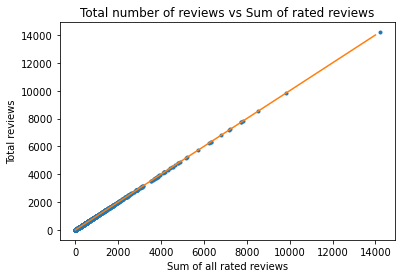

In [37]:
# Check if the sum of all 1-5 star reviews match total number of reviews
sum_of_rated_reviews = cleaned_data[['1star', '2star', '3star', '4star', '5star']].sum(axis = 1)

_ = plt.plot(sum_of_rated_reviews, cleaned_data['Total_reviews'], marker = '.', linestyle = 'None')
_ = plt.plot([0,14000], [0,14000])
_ = plt.title('Total number of reviews vs Sum of rated reviews')
_ = plt.xlabel('Sum of all rated reviews')
_ = plt.ylabel('Total reviews')
plt.show()

### 2.2.11 Ratings by concerns

<ipython-input-38-25d6fe0e4996>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axs[0].set_xticklabels(concerns, rotation = 90)
<ipython-input-38-25d6fe0e4996>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axs[1].set_xticklabels(concerns, rotation = 90)


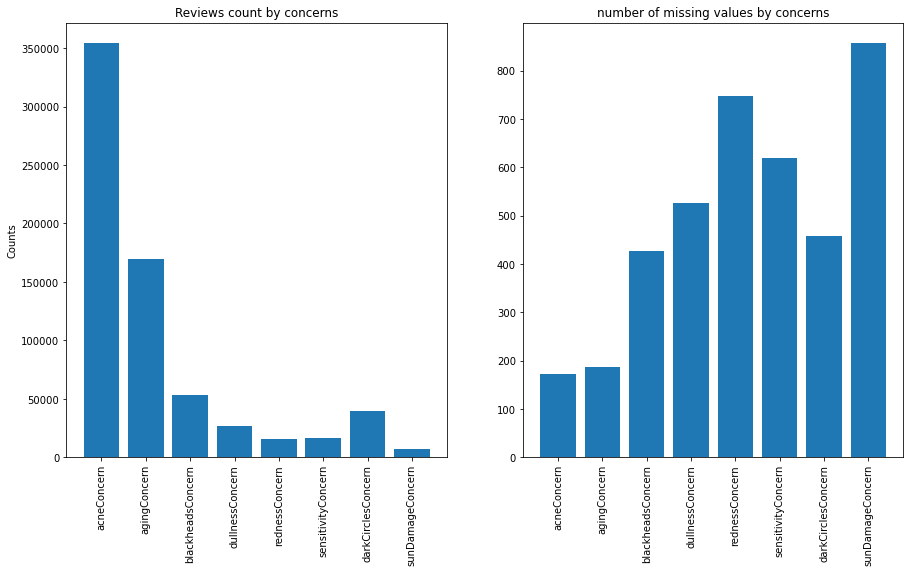

In [38]:
concerns = ['acneConcern', 'agingConcern', 'blackheadsConcern', 'dullnessConcern','rednessConcern', 
            'sensitivityConcern', 'darkCirclesConcern', 'sunDamageConcern']
    
fig, axs = plt.subplots(1, 2)
fig.set_figheight(8)
fig.set_figwidth(15)

_ = axs[0].bar(concerns, cleaned_data[concerns].sum())
_ = axs[0].set_title('Reviews count by concerns')
_ = axs[0].set_ylabel('Counts')
_ = axs[0].set_xticklabels(concerns, rotation = 90)

_ = axs[1].bar(concerns, cleaned_data[concerns].isnull().sum())
_ = axs[1].set_title('number of missing values by concerns')
_ = axs[1].set_xticklabels(concerns, rotation = 90)

In [39]:
# Relevant concerns:
(cleaned_data.fillna({'acneConcern': 0, 'agingConcern': 0, 'blackheadsConcern': 0, 'dullnessConcern': 0, 
              'sensitivityConcern': 0, 'darkCirclesConcern': 0, 'rednessConcern':0, 'sunDamageConcern':0},inplace=True))

### 2.2.12 Ratings by age groups

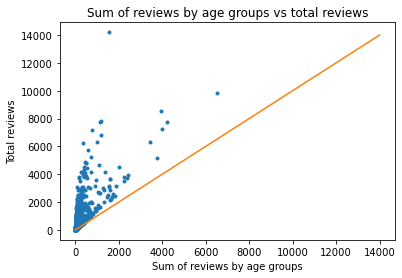

In [40]:
# Check if the sum of reviews from all age group match total number of reviews
age_groups = ['13to17', '18to24', '25to34', '35to44', '45to54', 'over54']
_ = plt.plot(cleaned_data[age_groups].sum(axis = 1), cleaned_data['Total_reviews'], marker = '.', linestyle = 'None')
_ = plt.plot([0, 14000], [0, 14000])
_ = plt.title('Sum of reviews by age groups vs total reviews')
_ = plt.xlabel('Sum of reviews by age groups')
_ = plt.ylabel('Total reviews')
plt.show()

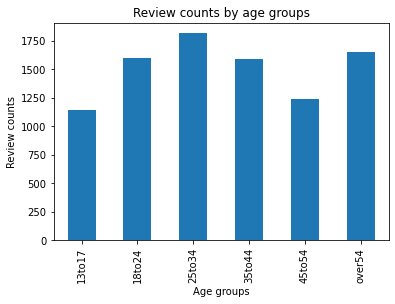

In [41]:
_ = cleaned_data[age_groups].count().plot(kind = 'bar')
_ = plt.title('Review counts by age groups')
_ = plt.xlabel('Age groups')
_ = plt.ylabel('Review counts')

In [42]:
# count missing values: 
# no_missing_age_groups = data[age_groups].apply(lambda x: sum(x.isnull().values), axis = 1)
# print('no products with at least 1 missing age groups: ', no_missing_age_groups[no_missing_age_groups>0].count())
# print('no products missing all age groups: ', no_missing_age_groups[no_missing_age_groups == len(age_groups)].count())
# (print('no products with more than 100 reviews missing at least one age group: ', 
#        data[(no_missing_age_groups >= 1) & (data['no_reviews']>=100)].shape[0]))
# (print('no products with more than 100 reviews missing all age groups: ', 
#        data[(no_missing_age_groups == len(age_groups)) & (data['no_reviews']>=100)].shape[0]))

In [43]:
cleaned_data.fillna({'13to17':0, '18to24':0, '25to34':0, '35to44':0, '45to54':0, 'over54':0}, inplace = True)

### 2.2.13 Incentivized reviews

In [44]:
# print('no products with missing incentivized reiews info: ', data[data['incentivizedReviews'].isna()].shape[0])
# fill missing values with 0
cleaned_data['incentivizedReviews'].fillna(value = 0, inplace = True)

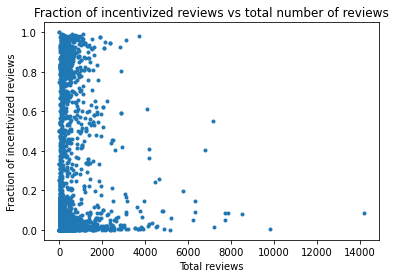

In [45]:
# fraction of ppl who received the products for free
frac_promotion = cleaned_data['incentivizedReviews']/cleaned_data['Total_reviews']

_ = plt.plot(cleaned_data['Total_reviews'], frac_promotion, marker = '.', linestyle = 'None')
_ = plt.title('Fraction of incentivized reviews vs total number of reviews')
_ = plt.ylabel('Fraction of incentivized reviews')
_ = plt.xlabel('Total reviews')
plt.show()

# products with fewer reviews tend to give out products for free to create incentive to write reviews 

### 2.2.14 Staff reviews

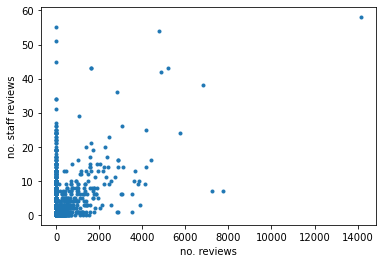

In [46]:
# fill missing values
cleaned_data['staffReviews'].fillna(value = 0, inplace = True)
_ = plt.plot(cleaned_data['no_reviews'], cleaned_data['staffReviews'],  marker = '.', linestyle = 'None')
_ = plt.ylabel('no. staff reviews')
_ = plt.xlabel('no. reviews')

# products with fewer reviews tend to receive more reviews from Sephora staffs 

### 2.2.15 Skin types

In [47]:
skin_types = ['normal', 'combination', 'oily', 'dry']
cleaned_data[skin_types].isnull().sum()

normal         133
combination     38
oily           186
dry            101
dtype: int64

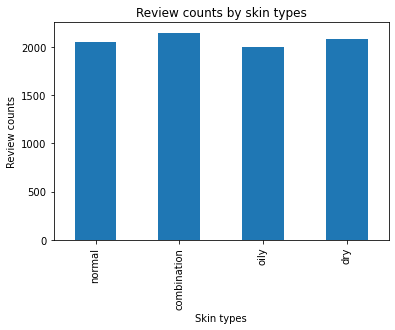

In [48]:
_ = cleaned_data[skin_types].count().plot(kind = 'bar')
_ = plt.title('Review counts by skin types')
_ = plt.xlabel('Skin types')
_ = plt.ylabel('Review counts')

In [49]:
# count missing values: 
# no_missing_skin_types = data[skin_types].apply(lambda x: sum(x.isnull().values), axis = 1)
# print('no products with at least 1 missing skin types: ', no_missing_skin_types[no_missing_skin_types>0].count())
# print('no products missing all age groups: ', no_missing_skin_types[no_missing_skin_types == len(skin_types)].count())
# (print('no products with more than 100 reviews missing at least one age group: ', 
#        data[(no_missing_skin_types >= 1) & (data['no_reviews']>=100)].shape[0]))
# (print('no products with more than 100 reviews missing all age groups: ', 
#        data[(no_missing_skin_types == len(age_groups)) & (data['no_reviews']>=100)].shape[0]))

In [50]:
cleaned_data.fillna({'normal':0, 'combination':0, 'oily':0, 'dry':0}, inplace = True)

## 2.3 Review data cleaning

In [51]:
reviews['UserNickname'].fillna(value = 'NoName', inplace = True)
reviews['ReviewText'].fillna(value = 'None', inplace = True)
reviews['isSephoraStaff'].fillna(value = 'false', inplace = True)
reviews['isIncentivizedReview'].fillna(value = 'false', inplace = True)
reviews['isVerifiedPurchase'].fillna(value = 'false', inplace = True)
reviews['userSkinConcern'].fillna(value = 'None', inplace = True)

In [52]:
# print('No of missing userSkinType: ', reviews['userSkinType'].isnull().sum())
# print('No of missing userEyeColor: ', reviews['userEyeColor'].isnull().sum())
# print('No of missing userHairColor: ', reviews['userHairColor'].isnull().sum())

In [57]:
# drop unused columns
#reviews.drop(columns = ['userSkinType', 'userEyeColor', 'userHairColor', 'userSkinTone'], inplace = True)
reviews[['isSephoraStaff', 'isVerifiedPurchase', 'isIncentivizedReview']] = (reviews[['isSephoraStaff', 
                                                                                      'isVerifiedPurchase', 
                                                                                      'isIncentivizedReview']].astype(bool).astype(int))
reviews.info()
reviews.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361834 entries, 0 to 361833
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   UserNickname                361834 non-null  object
 1   Rating                      361834 non-null  int64 
 2   ReviewText                  361834 non-null  object
 3   userSkinType                311405 non-null  object
 4   userEyeColor                279405 non-null  object
 5   isSephoraStaff              361834 non-null  int64 
 6   isVerifiedPurchase          361834 non-null  int64 
 7   userHairColor               280741 non-null  object
 8   userSkinTone                297371 non-null  object
 9   isIncentivizedReview        361834 non-null  int64 
 10  p_id                        361834 non-null  object
 11  author_id                   361834 non-null  object
 12  TotalPositiveFeedbackCount  361834 non-null  int64 
 13  TotalNegativeFeedbackCount  3

Index(['UserNickname', 'Rating', 'ReviewText', 'userSkinType', 'userEyeColor',
       'isSephoraStaff', 'isVerifiedPurchase', 'userHairColor', 'userSkinTone',
       'isIncentivizedReview', 'p_id', 'author_id',
       'TotalPositiveFeedbackCount', 'TotalNegativeFeedbackCount',
       'TotalFeedbackCount', 'userSkinConcern'],
      dtype='object')

## 2.4 Write cleaned data to files

In [54]:
cleaned_data.to_csv(path_or_buf= 'Cleaned_data/cleaned_all_products.csv', header = True)
reviews.to_csv(path_or_buf= 'Cleaned_data/cleaned_all_reviews.csv', header = True)

In [55]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 77 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            2184 non-null   object 
 1   product_name          2184 non-null   object 
 2   price                 2184 non-null   float64
 3   category              2184 non-null   object 
 4   loves_count           2184 non-null   int64  
 5   product_id            2184 non-null   object 
 6   no_reviews            2184 non-null   int64  
 7   rating                2184 non-null   float64
 8   short_description     2184 non-null   object 
 9   ingredients           2184 non-null   object 
 10  highlights            2184 non-null   object 
 11  unique_product_name   2184 non-null   object 
 12  Total_reviews         2184 non-null   float64
 13  RecommendedCount      2184 non-null   float64
 14  AverageOverallRating  2166 non-null   float64
 15  1star                